# ML Project: Bank Marketing Prediction

In [1]:
import pandas as pd 
import numpy as np 
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
print('.....setup complete')

.....setup complete


In [2]:
# reading csv file  
df=pd.read_csv("bank-marketing.csv")
print('shape of Dataframe is',df.shape)
df.head().T

shape of Dataframe is (45211, 19)


,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
salary,100000,60000,120000,20000,0
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
targeted,yes,yes,yes,no,no
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no


In [3]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
salary,45211.0,57006.171065,32085.718415,0.0,20000.0,60000.0,70000.0,120000.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


## Applying Z score 

In [5]:
z=np.abs(stats.zscore(df['pdays']))
z

array([0.41145311, 0.41145311, 0.41145311, ..., 1.43618859, 0.41145311,
       1.4761376 ])

In [6]:
print(np.where (z>3))

(array([32111, 32147, 32230, ..., 45177, 45188, 45199], dtype=int64),)


In [7]:
df1=df[(z<3)]

In [8]:
df1.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
salary,100000,60000,120000,20000,0
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
targeted,yes,yes,yes,no,no
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no


In [9]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43488.0,41.018051,10.650560,18.0,33.0,39.0,49.0,95.0
salary,43488.0,57222.475166,32096.579482,0.0,20000.0,60000.0,70000.0,120000.0
balance,43488.0,1375.997034,3065.244393,-8019.0,72.0,454.0,1448.0,102127.0
day,43488.0,15.921450,8.392264,1.0,8.0,16.0,22.0,31.0
duration,43488.0,258.637256,258.263740,0.0,103.0,180.0,319.0,4918.0
campaign,43488.0,2.786309,3.138208,1.0,1.0,2.0,3.0,63.0
pdays,43488.0,26.638797,73.270742,-1.0,-1.0,-1.0,-1.0,340.0
previous,43488.0,0.494665,2.205802,0.0,0.0,0.0,0.0,275.0


Text(0, 0.5, 'Education')

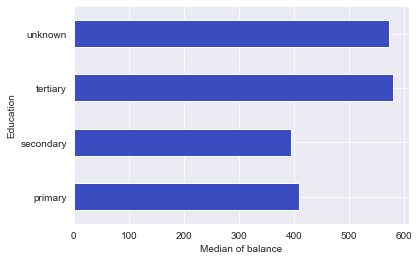

In [10]:
ax=df1['balance'].groupby(df1['education']).median().plot(kind='barh', colormap= 'coolwarm')
ax.set_xlabel("Median of balance")
ax.set_ylabel('Education')

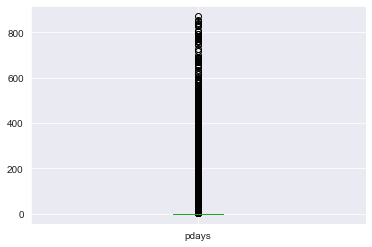

In [11]:
df.boxplot(column= 'pdays')

In [12]:
cat_col= [n for n in df1.columns if df1[n].dtypes == 'object']
for col in cat_col:
    print(col, '\n\n')
    print(df1[col].value_counts())
    print("============"*4)

job 


blue-collar      9191
management       9177
technician       7373
admin.           4910
services         3972
retired          2217
self-employed    1541
entrepreneur     1445
unemployed       1264
housemaid        1224
student           890
unknown           284
Name: job, dtype: int64
marital 


married     26301
single      12199
divorced     4988
Name: marital, dtype: int64
education 


secondary    22187
tertiary     12926
primary       6577
unknown       1798
Name: education, dtype: int64
targeted 


yes    35635
no      7853
Name: targeted, dtype: int64
default 


no     42692
yes      796
Name: default, dtype: int64
housing 


yes    23712
no     19776
Name: housing, dtype: int64
loan 


no     36455
yes     7033
Name: loan, dtype: int64
contact 


cellular     27739
unknown      12976
telephone     2773
Name: contact, dtype: int64
month 


may    12489
jul     6828
aug     6179
jun     5300
nov     3955
apr     2809
feb     2633
jan     1395
oct      705
sep      520
ma

In [13]:
#replcainmg yes and no into 1 and 0

df1.replace({'no': 0,'yes': 1},inplace=True)

Percentage of Response :  11.536515820456218
Percentage of No Response :  88.46348417954378


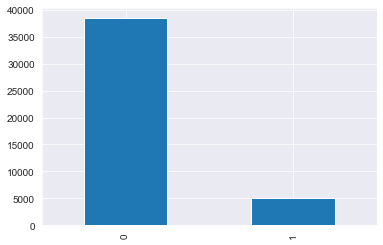

In [14]:
#check the percentage of response 

No_res = len(df1[df1['response'] == 0])
res = len(df1[df1['response'] == 1])

percent_No_res = (No_res/len(df1['response'])) * 100
percent_res = (res/len(df1['response'])) * 100


print('Percentage of Response : ',percent_res)
print('Percentage of No Response : ',percent_No_res)

df1['response'].value_counts().plot.bar()

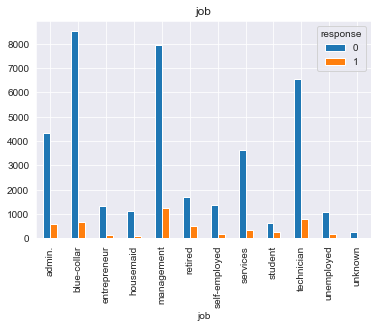

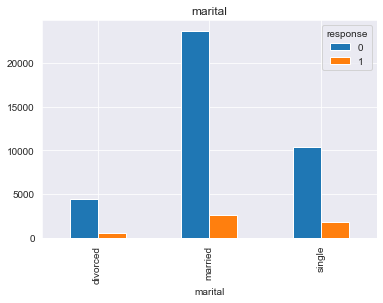

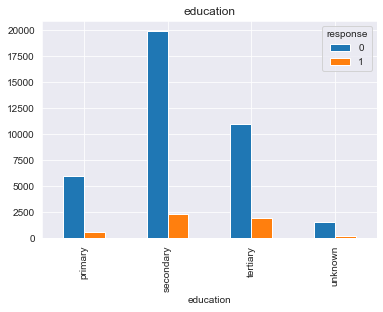

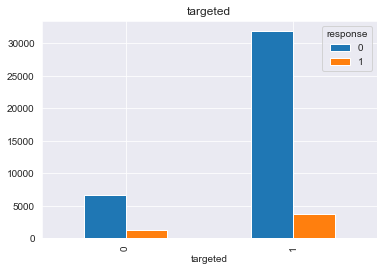

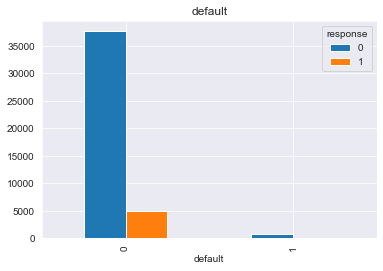

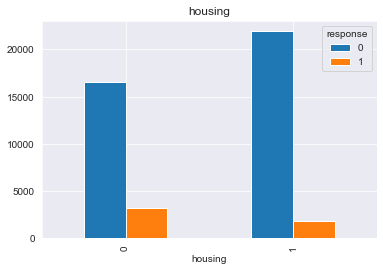

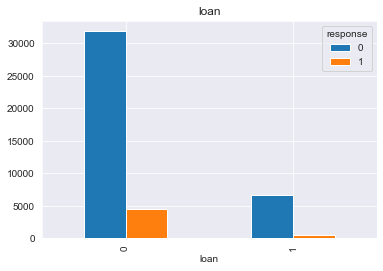

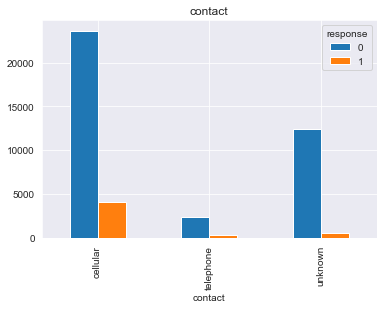

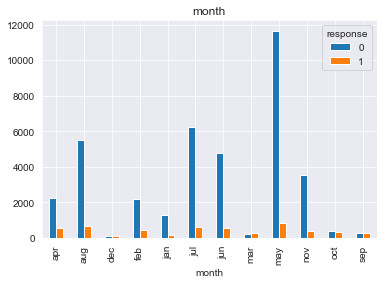

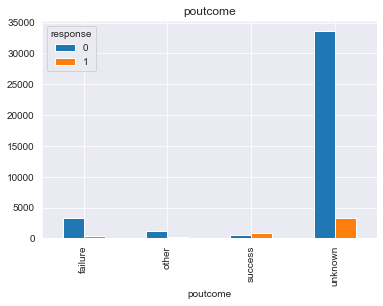

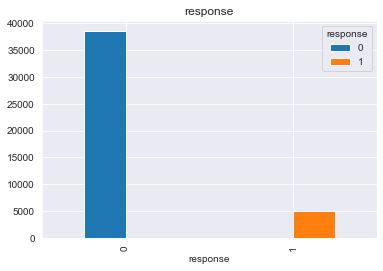

In [15]:
for col in cat_col:
    pd.crosstab(df1[col],df1.response).plot(kind='bar')
    plt.title(col)

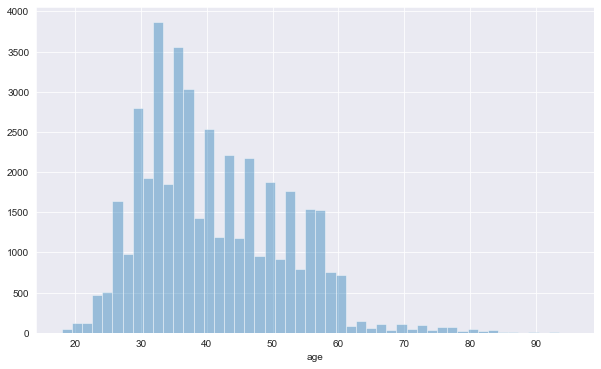

In [16]:
plt.figure(figsize = (10,6))
sns.distplot(a=df1['age'], kde=False)

In [17]:
df1['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
 181      117
 184       85
 95        74
 94        72
 175       71
 185       68
 93        65
 188       64
 186       60
 189       60
 96        57
 174       57
 90        54
 97        54
 196       51
 98        49
 178       47
 190       46
 180       45
 99        45
 195       45
 104       45
 172       44
 150       43
 179       43
        ...  
 44         3
 66         3
 15         3
 49         3
 42         3
 19         2
 33         2
 20         2
 72         2
 46         2
 4          2
 59         2
 43         2
 39         2
 220        2
 34         2
 24         2
 52         2
 18         1
 51         1
 26         1
 47         1
 65         1
 45         1
 54         1
 218        1
 3          1
 25         1
 30         1
 32         1
Name: pdays, Length: 338, dtype: int64

In [18]:
df1= pd.get_dummies(df1,columns=['job','marital','education',
                               'contact','month',
                               'poutcome'],drop_first = True)


In [19]:
df1.shape

(43488, 45)

# Train and Test Split

In [20]:
from sklearn.model_selection import train_test_split

X= df1.loc[:,df1.columns != 'response']
y= df1.loc[:,df1.columns == 'response']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.25,random_state=0)

# Next we normalise our data using skelarn’s StandardScaler

In [21]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# LogisticRegression MODELLING

In [22]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression()
clf.fit(X_train, y_train)
print('Train Accuracy :', clf.score(X_train,y_train))
print('Test Accuracy :', clf.score(X_test,y_test))

Train Accuracy : 0.9032376747608536
Test Accuracy : 0.9029617365710081


In [23]:
y_pred= clf.predict(X_test)

### Estimating the model performance using k fold cross validation

In [24]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn import model_selection

results = []
kfold = model_selection.KFold(n_splits=10, random_state=42)
cv_results = model_selection.cross_val_score(clf, X_train,y_train,cv=kfold,scoring='accuracy')
results.append(cv_results)
msg="{}: {}".format('Logistic Regression',cv_results.mean())
print(msg)

Logistic Regression: 0.9030538905155423


### Precision, Recall and Accuracy of model

In [52]:
from sklearn import metrics 

print('precision = ',metrics.precision_score(y_test,y_pred)*100,'%')
print('recall = ',metrics.recall_score(y_test,y_pred)*100,'%')
print('Accuracy = ',metrics.accuracy_score(y_test,y_pred)*100,'%')

precision =  63.69137670196672 %
recall =  34.06148867313916 %
Accuracy =  90.29617365710081 %


### Feature importance in logistic regression model

In [26]:
from sklearn.feature_selection import RFE

predictors = X_train
selector = RFE(clf, n_features_to_select = 1)
selector = selector.fit(predictors, y_train)
order = selector.ranking_
feature_rank = []
for i in order:
    feature_rank.append(df1.columns[i])

In [27]:
a= range(43)
for i in a:
    print(order[i],',',feature_rank[i])

44 , poutcome_unknown
18 , job_self-employed
39 , month_nov
43 , poutcome_success
35 , month_jul
4 , balance
13 , job_blue-collar
16 , job_management
1 , salary
12 , response
8 , duration
40 , month_oct
29 , contact_telephone
19 , job_services
28 , education_unknown
20 , job_student
31 , month_aug
25 , marital_single
21 , job_technician
17 , job_retired
23 , job_unknown
37 , month_mar
42 , poutcome_other
14 , job_entrepreneur
41 , month_sep
32 , month_dec
24 , marital_married
33 , month_feb
34 , month_jan
2 , targeted
6 , loan
36 , month_jun
30 , contact_unknown
11 , previous
5 , housing
22 , job_unemployed
15 , job_housemaid
10 , pdays
9 , campaign
26 , education_secondary
27 , education_tertiary
38 , month_may
3 , default


# Random Forest MODELLING

### Checking the most optimum Depth 

In [30]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 9))


In [31]:
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    rfc = RandomForestClassifier(max_depth = depth, 
                             random_state = 0)
    rfc.fit(X_train, y_train)
    score1 = rfc.score(X_test, y_test)
    accuracy.append(score1)

In [32]:
print("1:",accuracy[0],"...2:",accuracy[1],"...3:",accuracy[2],"...4",accuracy[3],"...5",accuracy[4],"...6",accuracy[5],"...7",accuracy[6],"....8",accuracy[7])

1: 0.8863134657836644 ...2: 0.8863134657836644 ...3: 0.8864974245768947 ...4 0.8896247240618101 ...5 0.8928440029433407 ...6 0.8967991169977925 ...7 0.8984547461368654 ....8 0.8996504782928624


### Building Random Forest with 50 trees and max depth = 8

In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state= 0, max_depth=8)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [58]:
y1_pred = rfc.predict(X_test)

###  Validating using 10 fold cross validation

In [59]:
results1=[]
kfold1=model_selection.KFold(n_splits=10,random_state=42)
cv_results1 = model_selection.cross_val_score(rfc,X_train,y_train,cv=kfold, scoring='accuracy')
results1.append(cv_results1)
rf = "{}: {}".format("Random Forest",cv_results1.mean())
print(rf)

Random Forest: 0.8971363536629596


### Precision, Recall and Accuracy of model

In [60]:
print('Precision = ',metrics.precision_score(y_test,y1_pred)*100,'%')
print('Recall = ',metrics.recall_score(y_test,y1_pred)*100,'%')
print('Accuracy=', metrics.accuracy_score(y_test,y1_pred)*100,'%')

Precision =  80.41666666666667 %
Recall =  15.614886731391586 %
Accuracy= 89.97424576894775 %


### Checking Feature importance for random forest

In [50]:
names = []
for col in df1.columns: 
    names.append(col) 
print('Features sorted by their score:')
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names),reverse=True))

Features sorted by their score:
[(0.386, 'duration'), (0.1702, 'poutcome_other'), (0.0583, 'age'), (0.0429, 'pdays'), (0.0336, 'housing'), (0.0318, 'contact_telephone'), (0.0301, 'month_nov'), (0.0278, 'poutcome_success'), (0.0267, 'month_jun'), (0.0251, 'previous'), (0.0212, 'day'), (0.0212, 'balance'), (0.0172, 'month_oct'), (0.0115, 'salary'), (0.0105, 'campaign'), (0.008, 'month_jul'), (0.0065, 'job_unknown'), (0.0063, 'month_mar'), (0.0061, 'loan'), (0.0053, 'job_services'), (0.0046, 'contact_unknown'), (0.0043, 'targeted'), (0.0043, 'month_aug'), (0.0043, 'marital_married'), (0.0038, 'job_management'), (0.0038, 'education_secondary'), (0.0029, 'month_jan'), (0.0026, 'month_dec'), (0.0024, 'marital_single'), (0.0023, 'education_unknown'), (0.0022, 'month_may'), (0.002, 'response'), (0.0017, 'month_sep'), (0.0017, 'month_feb'), (0.0016, 'education_tertiary'), (0.0015, 'job_housemaid'), (0.0014, 'job_student'), (0.0011, 'job_technician'), (0.001, 'job_self-employed'), (0.001, 'job_r

# AUC curve

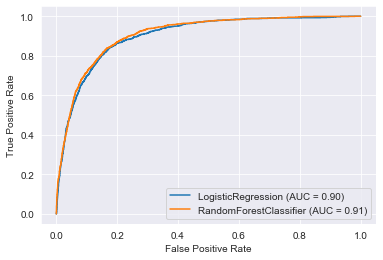

In [61]:
from sklearn.metrics import plot_roc_curve

disp=plot_roc_curve(clf,X_test, y_test)
plot_roc_curve(rfc,X_test, y_test,ax=disp.ax_);



# Here we can conclude that:

1. Logistic regression have the better accuracy than the Random Forest & SVM but the Area Under the Curve (AUC) and Precision of the Random forest is better than other models.

2. So, I think the RANDOM FOREST should be choosen over Logistic Regression and SVM. 